In [1]:
import pandas as pd
import numpy as np

In [2]:
auc_df = pd.read_csv(
    "/app/experiments/paper/filter_table/IJBC/open_set_identification/tabels/f1_class_auc_rejection.csv"
)

In [3]:
new_auc_df_lines = []
new_auc_df_columns = ["models"] + list(auc_df.columns[3:-1])
aucs = []
model_names = []
for far, df in auc_df.groupby("far"):
    new_auc_df_columns.append(f"FAR={far}")
    aucs.append(list(df["auc"]))
    model_names = list(df["models"])
aucs = np.array(aucs).T
aucs = list(aucs)
for model_name, auc in zip(model_names, aucs):
    new_auc_df_lines.append([model_name, *auc.tolist()])
new_auc_df = pd.DataFrame(new_auc_df_lines, columns=new_auc_df_columns)

In [4]:
new_auc_df

,models,FAR=0.005,FAR=0.01,FAR=0.05,FAR=0.1
0,$u_{SCF}$,0.2939,0.2939,0.2898,0.2832
1,$u_{vMF}$,0.2951,0.2953,0.2941,0.2905
2,$u_{power}$,0.2950,0.2953,0.2941,0.2907
3,$u_{baseline}$,0.2951,0.2953,0.2940,0.2903
4,$u_{vMF} + u_{SCF}$,0.2952,0.2957,0.2943,0.2908
5,$u_{power} + u_{SCF}$,0.2958,0.2961,0.2945,0.2910
6,$u_{baseline} + u_{SCF}$,0.2958,0.2959,0.2944,0.2907


### Template pooling

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
from evaluation.visualize import (
    plot_dir_far_scores,
    plot_cmc_scores,
    plot_rejection_scores,
)

out_dir = Path(
    "/app/experiments/paper/template_aggregation_plot/IJBC/open_set_identification"
)
tables_path = out_dir / "tabels"
far_table = pd.read_csv(tables_path / "far_rejection.csv")
dir_table = pd.read_csv(tables_path / "dir_rejection.csv")

y_label = "Detection $&$ Identification rate"

model_to_points = {}
for model_name, far_value, dir_value in zip(
    far_table.models, far_table["0.0"], dir_table["0.0"]
):
    if model_name in model_to_points:
        model_to_points[model_name].append([far_value, dir_value])
    else:
        model_to_points[model_name] = [[far_value, dir_value]]
    # if "SCF" in model_name:
    #     scores[0].append([far_value, dir_value])
    # else:
    #     scores[1].append([far_value, dir_value])
# scores[0] = np.array(scores[0]).T
# scores[1] = np.array(scores[1]).T

In [6]:
model_to_points["$u_{SCF}$"]

[[0.0999697672074977, 0.9633919338159256],
 [0.0498841076287413, 0.9600827300930712]]

In [7]:
names = []
scores = []
for model_name, points in model_to_points.items():
    names.append(model_name)
    scores.append(np.array(points).T)
    print(model_name, points)
scores = np.array(scores)
# scores = scores.T

$u_{SCF}$ [[0.0999697672074977, 0.9633919338159256], [0.0498841076287413, 0.9600827300930712]]
$u_{vMF} + u_{SCF}$ [[0.0984581275823843, 0.9627714581178904], [0.0499848836037488, 0.9578076525336092]]


In [8]:
1

1

In [9]:
names

['$u_{SCF}$', '$u_{vMF} + u_{SCF}$']

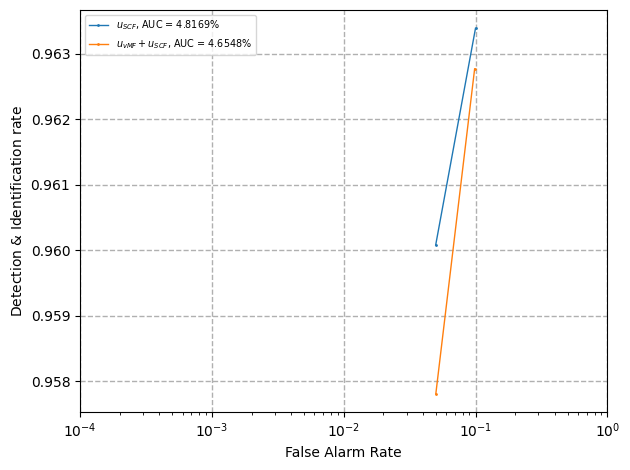

In [10]:
fig = plot_dir_far_scores(scores, names, y_label, marker=".")

In [11]:
fig.savefig(out_dir / f"pool.png", dpi=300)

plt.close(fig)

NameError: name 'plt' is not defined